# In the Name of God
    mohammd mohajel sadegi - 810199483

# Imports:

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import feature_selection
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline

# Defines:

# Phase1: Exploratory Data Analysis

---
## Raed Dataframe    
read diabetes.csv and save dataframe in patients_info

In [15]:
patients_info = pd.read_csv("diabetes.csv")

**head** returns first n columns of dataframe defult number is n = 5.

## Main Structure Of Data

In [16]:
patients_info.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,NaN,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,NaN,137.0,40.0,35.0,168.0,NaN,NaN,33.0,1


by using **describe** we can find statical info about our dataframe like min, max, mean, std, ...

In [17]:
patients_info.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,635.000000,654.000000,680.000000,624.000000,680.000000,684.000000,590.000000,655.000000,768.000000
mean,3.700787,113.422018,68.786765,20.386218,80.123529,32.083626,0.466676,33.157252,0.348958
std,3.518126,202.816831,19.724841,15.987049,115.681140,7.800741,0.322408,13.829831,0.476951
min,-22.000000,-5000.000000,-2.000000,0.000000,0.000000,0.000000,0.078000,-150.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.375000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.300000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.250000,36.600000,0.611500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


**info** prints information about the DataFrame.

The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)

In [18]:
patients_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               635 non-null    float64
 1   Glucose                   654 non-null    float64
 2   BloodPressure             680 non-null    float64
 3   SkinThickness             624 non-null    float64
 4   Insulin                   680 non-null    float64
 5   BMI                       684 non-null    float64
 6   DiabetesPedigreeFunction  590 non-null    float64
 7   Age                       655 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


## Missing Values:

### counting NAN values
in order to coumt NAN values, we use two functions:

**isna()** which returns a boolean same-sized object indicating if the values are NA

**sum()** now if we find sum of *passangers.isna()* we can count number of missing values at each column. 

In [22]:
number_of_misiing_values = patients_info.isna().sum()
print(number_of_misiing_values)

Pregnancies                 133
Glucose                     114
BloodPressure                88
SkinThickness               144
Insulin                      88
BMI                          84
DiabetesPedigreeFunction    178
Age                         113
Outcome                       0
dtype: int64


In [23]:
number_of_misiing_values / len(patients_info)

Pregnancies                 0.173177
Glucose                     0.148438
BloodPressure               0.114583
SkinThickness               0.187500
Insulin                     0.114583
BMI                         0.109375
DiabetesPedigreeFunction    0.231771
Age                         0.147135
Outcome                     0.000000
dtype: float64

## Correlation:

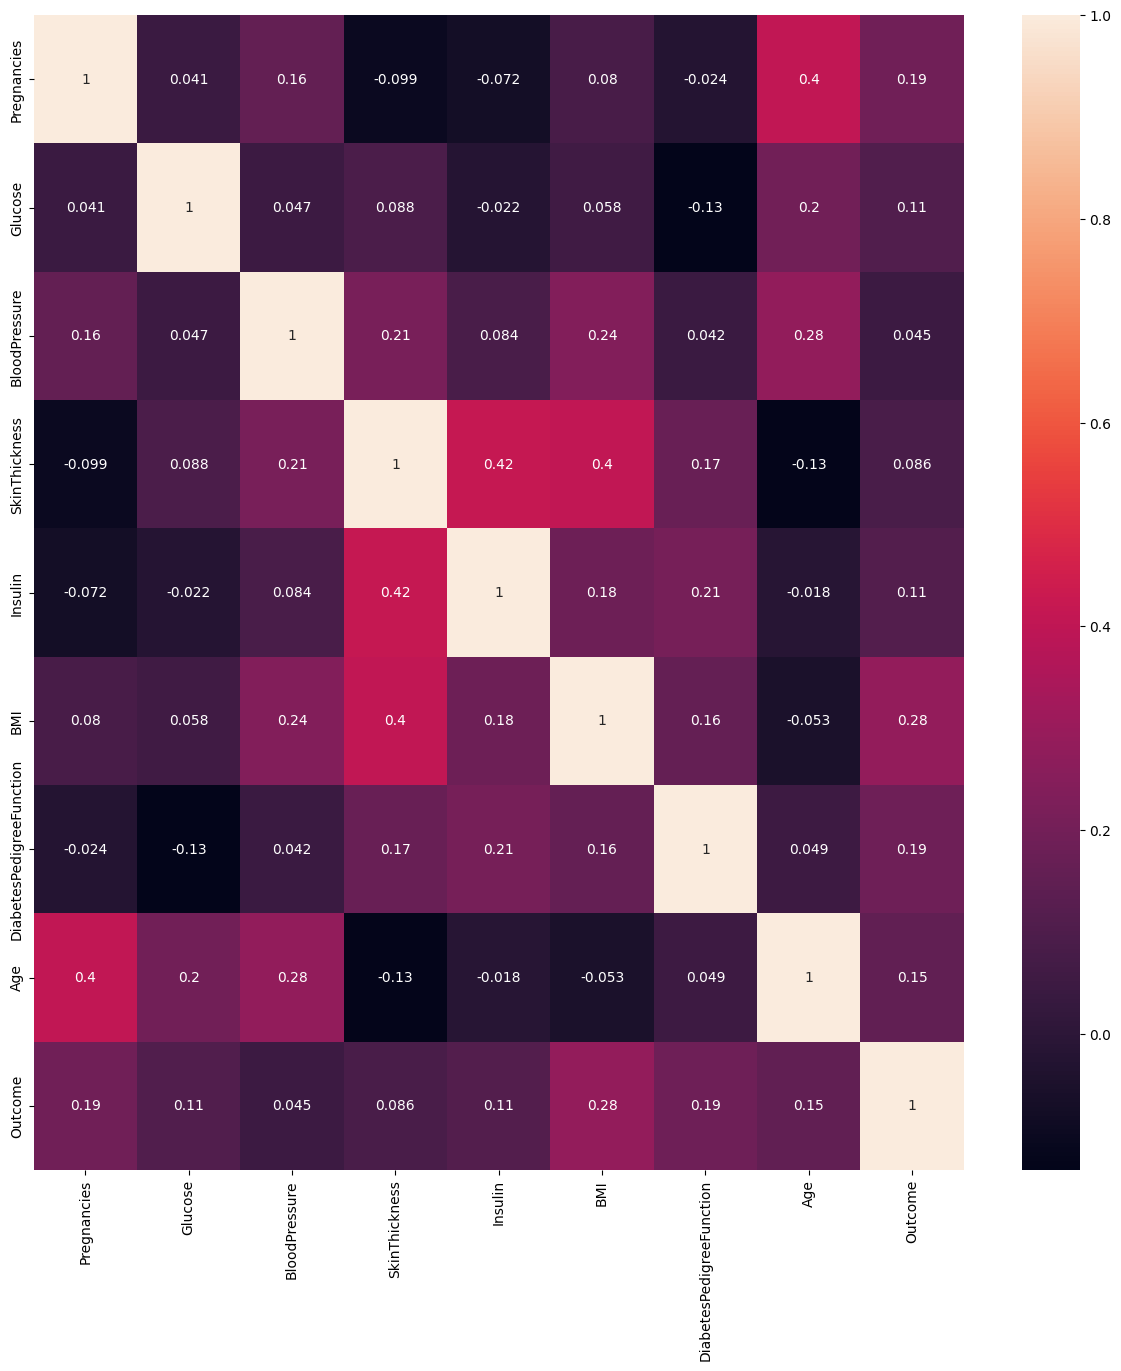

In [36]:
corr = patients_info.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True)
plt.show()

As you can see, **BMI** has most cortion with outcome

(array([  9.,   0.,  12., 138., 238., 204.,  68.,  11.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

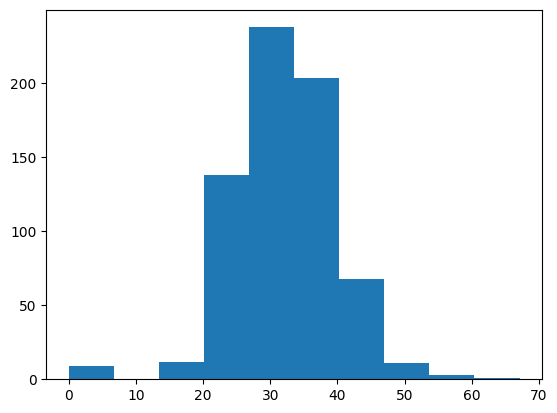

In [60]:
plt.hist(patients_info["BMI"])

 **BMI** has normal like distribution 

(array([  1.,   0.,   0.,   0.,   1., 208., 252., 125.,  45.,   3.]),
 array([-22. , -18.1, -14.2, -10.3,  -6.4,  -2.5,   1.4,   5.3,   9.2,
         13.1,  17. ]),
 <BarContainer object of 10 artists>)

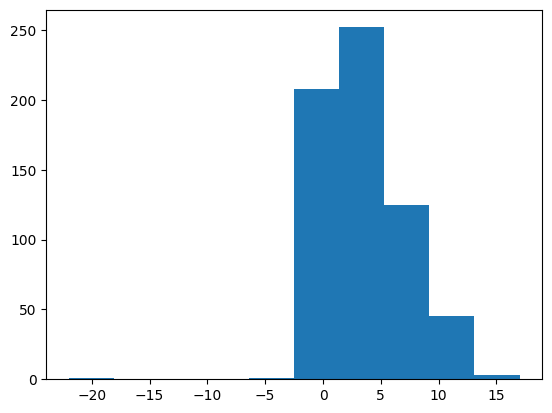

In [61]:
plt.hist(patients_info["Pregnancies"])

(array([241., 154., 108.,  48.,  17.,  13.,   3.,   3.,   1.,   2.]),
 array([0.078 , 0.3031, 0.5282, 0.7533, 0.9784, 1.2035, 1.4286, 1.6537,
        1.8788, 2.1039, 2.329 ]),
 <BarContainer object of 10 artists>)

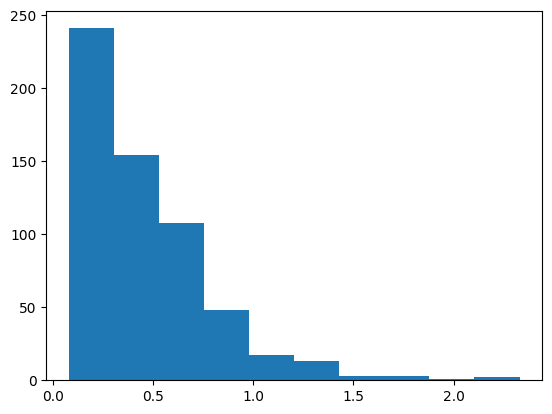

In [62]:
plt.hist(patients_info["DiabetesPedigreeFunction"])

## Hexbin:

In [102]:
def plot_hexbin(column):
        plt.xlabel(column)
        plt.ylabel("Outcome")
        plt.hexbin(patients_info[column], patients_info["Outcome"], cmap=plt.cm.BuGn_r)

def plot_scatter(column):
        plt.xlabel(column)
        plt.ylabel("Outcome")
        plt.scatter(patients_info[column], patients_info["Outcome"], s=1)

def plot_information(column):
        fig = plt.figure(figsize=(12,4))
        plt.subplot(121)
        plot_hexbin("BMI")
        plt.subplot(122)
        plot_scatter("BMI")
        ax = sns.displot(patients_info["BMI"], kde = True)


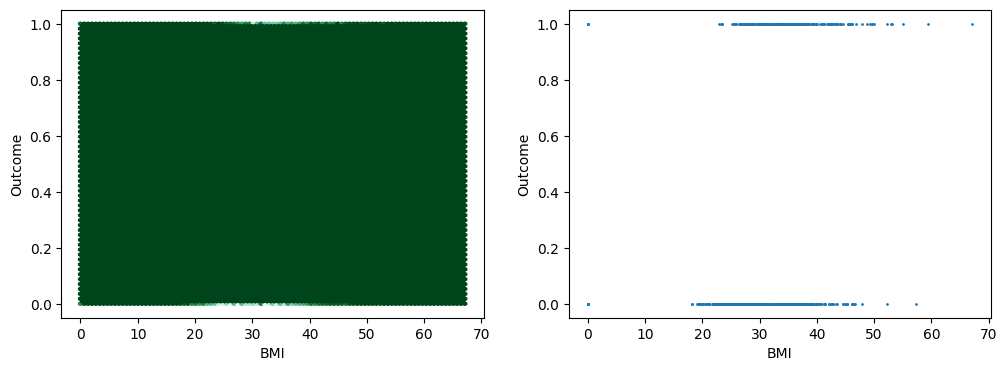

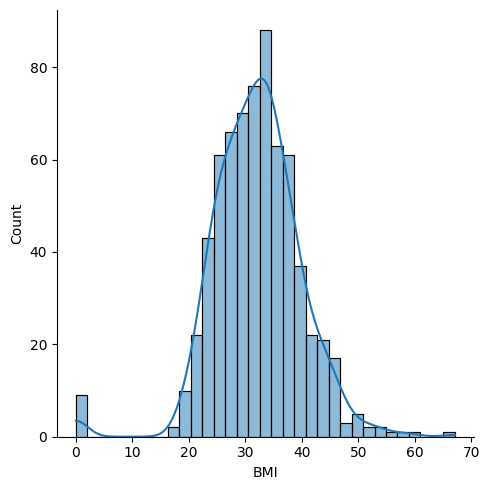

In [103]:
plot_information("BMI")

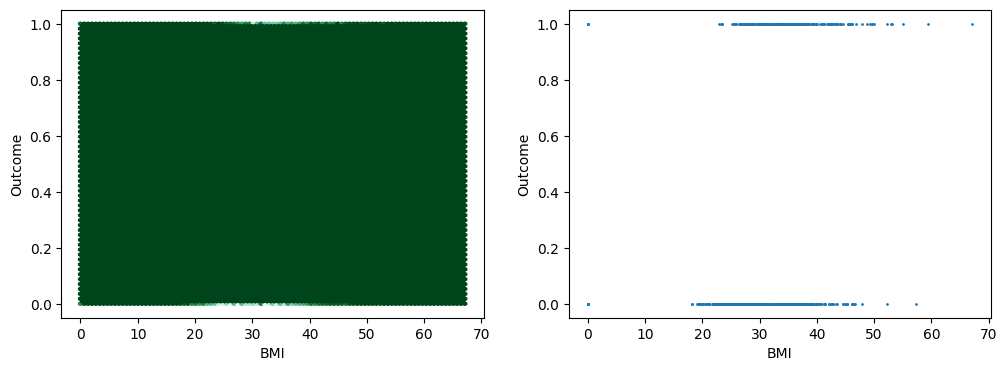

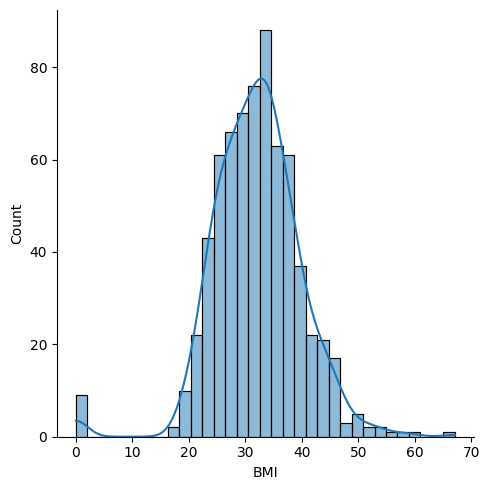

In [104]:
plot_information("Pregnancies")

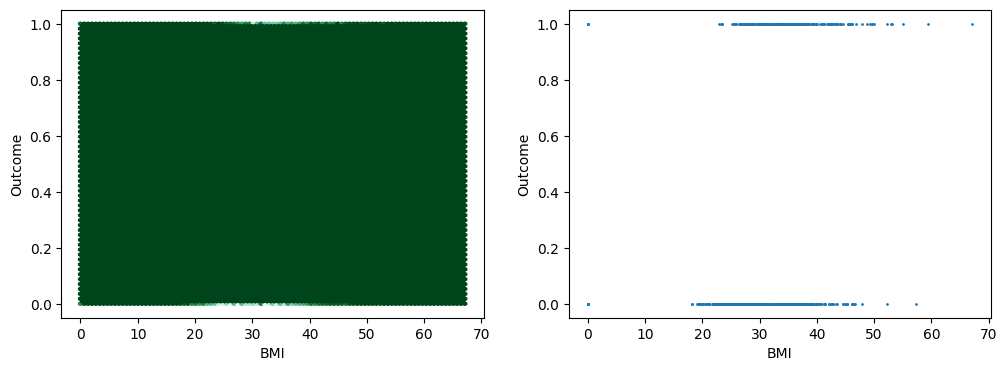

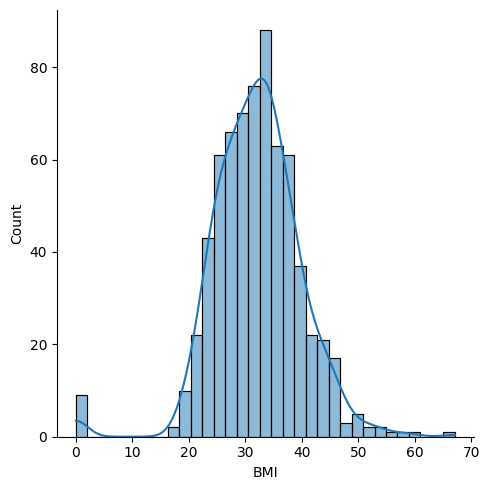

In [105]:
plot_information("DiabetesPedigreeFunction")